In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import scipy.optimize as opt

In [63]:
def randomwalk_time(time): 
    return np.array(range(time))
def randomwalk_x(time):
    z=[]
    for i in range(time):
        if i==0:
            z.append(0)
        else:
            j=random.random()
            if j<0.5:
                z.append(z[i-1]-1)
            else:
                z.append(z[i-1]+1)    
    return z
def randomwalk_x_2(time):
    z=[]
    for i in range(time):
        if i==0:
            z.append(0)
        else:
            j=random.random()
            if j<0.25:
                z.append(z[i-1]-1)
            elif 0.25<=j<0.50:
                z.append(z[i-1]+1)   
            elif 0.50<=j<0.75:
                z.append(z[i-1]+2) 
            else:
                z.append(z[i-1]-2)
    return z
def root_mean_square(input_array):
    input_array_sq=[k**2 for k in input_array]
    return np.sqrt(np.average(input_array_sq))
def sqrt_of_t(t,D):
    return np.sqrt(2*D*t)

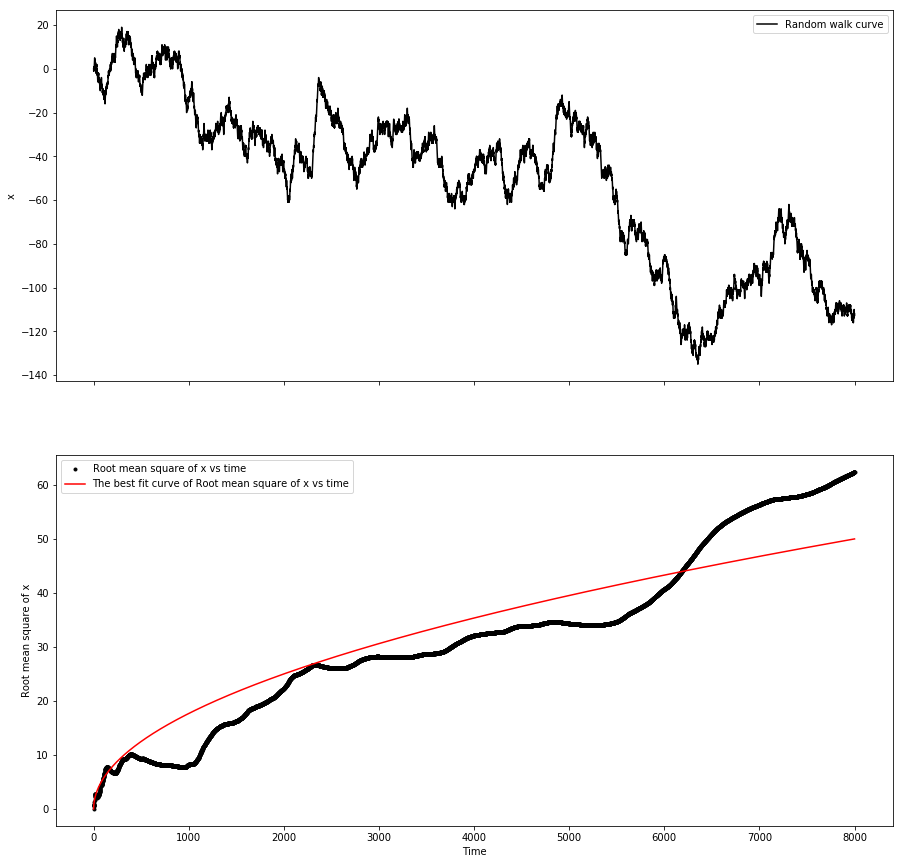

The estimated root mean square value of x(t) is:62.399433401585426
The estimated constant D is:[0.15629666]


In [64]:
t=randomwalk_time(8001)
x=randomwalk_x(8001)
xrms=[]
for i in range(8001):
    element=[]
    for j in range(i+1):
        element.append(x[j])
    xrms.append(root_mean_square(element))
    
best_params, cov_matrix = opt.curve_fit(sqrt_of_t, xdata = t, ydata = xrms, p0 = 0.5)
best_D=best_params
best_fit_curve=sqrt_of_t(t,best_D)
    
plt.figure(figsize=(15,15))
xvst=plt.subplot(211)        
plt.plot(t,x,'k',label='Random walk curve')
plt.setp(xvst.get_xticklabels(),visible=False)
plt.ylabel("x")
plt.legend(loc=0)

xrmsvst=plt.subplot(212,sharex=xvst)
plt.plot(t,xrms,'.k',label='Root mean square of x vs time')
plt.plot(t,best_fit_curve,'r',label="The best fit curve of Root mean square of x vs time")
plt.xlabel('Time')
plt.ylabel('Root mean square of x')
plt.legend(loc=0)
plt.show()

print("The estimated root mean square value of x(t) is:" + str(root_mean_square(x)))
print("The estimated constant D is:" + str(best_D))


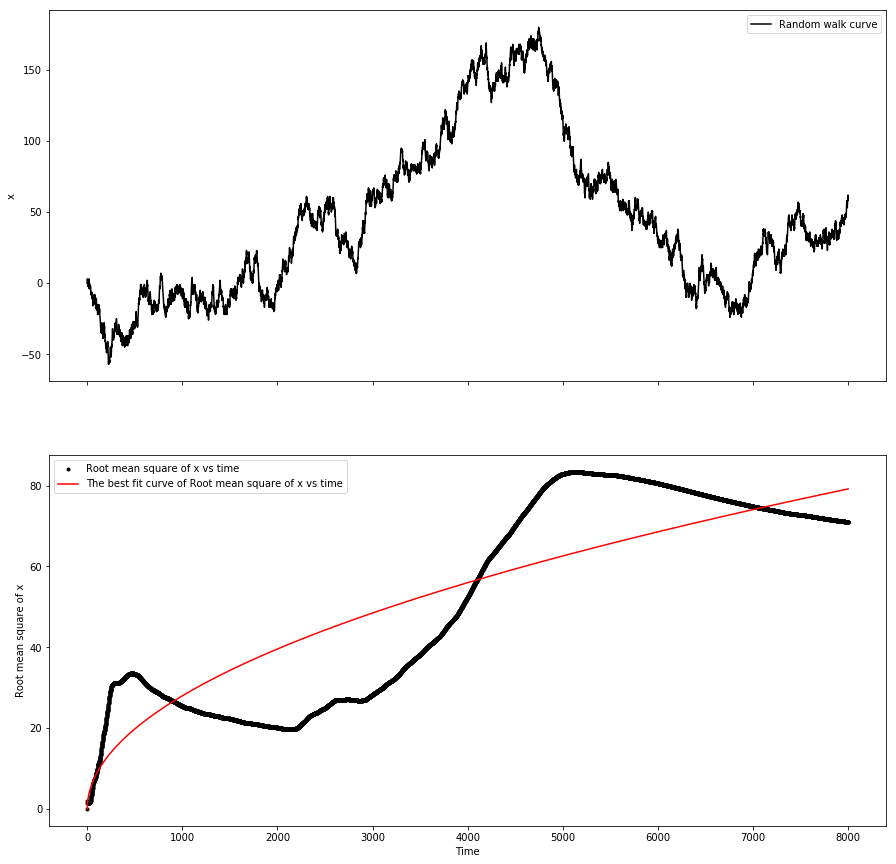

The estimated root mean square value of x(t) is:71.0546692993947
The estimated constant D is:[0.39201249]


In [67]:
x2=randomwalk_x_2(8001)
xrms2=[]
for i in range(8001):
    element=[]
    for j in range(i+1):
        element.append(x2[j])
    xrms2.append(root_mean_square(element))
    
best_params2, cov_matrix2 = opt.curve_fit(sqrt_of_t, xdata = t, ydata = xrms2, p0 = 1)
best_D2=best_params2
best_fit_curve2=sqrt_of_t(t,best_D2)

plt.figure(figsize=(15,15))
xvst2=plt.subplot(211)        
plt.plot(t,x2,'k',label='Random walk curve')
plt.setp(xvst2.get_xticklabels(),visible=False)
plt.ylabel("x")
plt.legend(loc=0)

xrmsvst2=plt.subplot(212,sharex=xvst2)
plt.plot(t,xrms2,'.k',label='Root mean square of x vs time')
plt.plot(t,best_fit_curve2,'r',label="The best fit curve of Root mean square of x vs time")
plt.xlabel('Time')
plt.ylabel('Root mean square of x')
plt.legend(loc=0)
plt.show()

print("The estimated root mean square value of x(t) is:" + str(root_mean_square(x2)))
print("The estimated constant D is:" + str(best_D2))